# Economic Data Analysis

In [3]:
!pip install fredapi

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#preset styling
plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '063c55cc062f89e6d19658eab79815cc'

# 1. Create the Fred Object

In [9]:
fred = Fred(api_key = fred_key)

# 2. Search for Economic Data

In [11]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-03-20,2025-03-20,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-03-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-19 08:35:06-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-03-20,2025-03-20,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:11:20-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-03-20,2025-03-20,S&P 500,2015-03-20,2025-03-19,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-03-19 19:11:49-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-03-20,2025-03-20,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-03-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-19 08:35:10-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-03-20,2025-03-20,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-03-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-19 08:43:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2025-03-20,2025-03-20,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-07 15:28:48-05:00,3,Private credit by deposit money banks and othe...
Q03069USQ605NNBR,Q03069USQ605NNBR,2025-03-20,2025-03-20,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."
CSHICPCZA156NRUG,CSHICPCZA156NRUG,2025-03-20,2025-03-20,Share of Gross Capital Formation at Current Pu...,1990-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:36:33-06:00,3,Source ID: csh_i When using these data in you...


# 3. Pull Raw Data and Plot

<Axes: title={'center': 'S&P500'}>

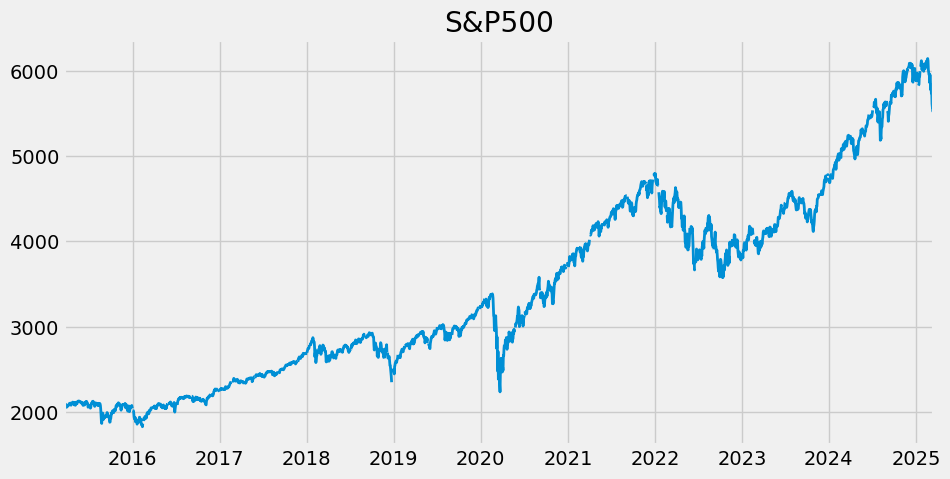

In [19]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P500', lw=2)

# Pull and Join Multiple Data Series

In [ ]:
# Exploring unemployment data
# unemp_results = fred.search('unemployment', order_by='popularity')
# unrate = fred.get_series('UNRATE')

In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('title', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [78]:
unemp_df = fred.get_series('GAUR')

In [80]:
unemp_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 588 entries, 1976-01-01 to 2024-12-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
588 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


In [61]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)